In [1]:
# Standard Python modules
import os, sys
import numpy as np
import pandas as pd
import xarray as xr

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature

# extras
%matplotlib inline
import metpy.calc as mpcalc
from metpy.units import units
from scipy import stats

# Import my modules
sys.path.append('../modules') # Path to modules
from constants import ucsd_colors
from plotter import SeabornFig2Grid as sfg
from preprocess_dataframes import combine_ivt_ar_prec_df, df_annual_clim, calculate_ivt_prec_percentiles, df_AR_annual_clim

pd.options.display.float_format = "{:,.2f}".format # makes it so pandas tables display only first two decimals

ERROR 1: PROJ: proj_create_from_database: Open of /cw3e/mead/projects/cwp140/scratch/dnash/miniconda3/envs/SEAK-clim/share/proj failed


In [2]:
path_to_data = '/home/dnash/SEAK_clim_data/' 
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
## open precipitation and ivt dfs
## append precip to each community IVT df
option = 'a'
temporal_res = 'daily'
community_lst = ['Hoonah', 'Skagway', 'Klukwan', 'Yakutat', 'Craig', 'Kasaan']

df_lst = combine_ivt_ar_prec_df(option, temporal_res, community_lst) # combine dfs into list of dfs
prec_clim, prec_std = df_annual_clim(df_lst, community_lst, varname='prec') # get precipitation annual climatology
ivt_clim, ivt_std = df_annual_clim(df_lst, community_lst, varname='IVT') # get IVT annual climatology
ar_clim = df_AR_annual_clim(df_lst, community_lst, varname='AR') # get AR annual climatology
prec_percentile, ivt_percentile = calculate_ivt_prec_percentiles(df_lst, community_lst) # get dataframe of percentiles

# some cleaning for the dfs for the annual clim fig
prec_clim['month'] = prec_clim.index.values - 1
prec_melt = pd.melt(prec_clim, id_vars='month')

ivt_clim['month'] = ivt_clim.index.values - 1
ivt_melt = pd.melt(ivt_clim, id_vars='month')



<AxesSubplot: >

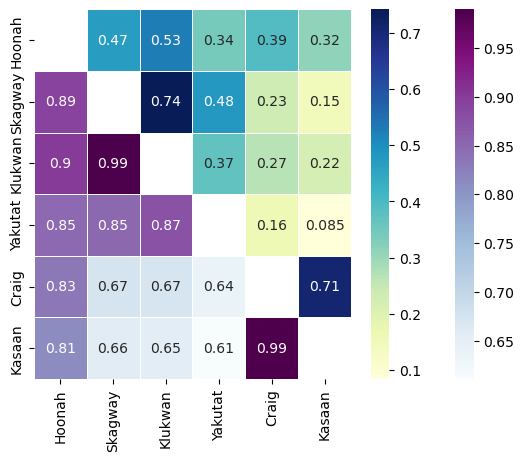

In [4]:
## create correlation table
ivt_corr = ivt_percentile.corr('pearson')
prec_corr = prec_percentile.corr('pearson')

matrix_0 = np.triu(ivt_corr)
matrix_1 = np.tril(prec_corr)

sns.heatmap(ivt_corr,annot=True,mask=matrix_0,cmap="BuPu", linewidth=.5, xticklabels=community_lst, yticklabels=community_lst)
sns.heatmap(prec_corr,annot=True,mask=matrix_1,cmap="YlGnBu", linewidth=.5, xticklabels=community_lst, yticklabels=community_lst)

In [5]:
df_lst[0]

,time,IVT,lat,lon,uIVT,vIVT,IWV,ivtdir,AR,impact,prec,prec_Hoonah,ivt_Hoonah
time,,,,,,,,,,,,,
1980-01-01,1980-01-01,148.93,58.00,-135.50,29.62,148.30,11.56,211.02,0,0,6.35,0.61,0.58
1980-01-02,1980-01-02,147.08,58.00,-135.50,6.58,146.94,11.51,186.81,0,0,10.58,0.77,0.57
1980-01-03,1980-01-03,101.50,58.00,-135.50,26.70,101.25,10.91,257.80,0,0,20.42,0.93,0.40
1980-01-04,1980-01-04,29.98,58.00,-135.50,21.53,3.76,5.02,357.52,0,0,0.19,0.06,0.06
1980-01-05,1980-01-05,207.19,58.00,-135.50,200.70,-24.81,10.29,343.00,1,0,NaN,NaN,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2019-12-27,181.51,58.00,-135.50,83.21,173.45,13.28,236.71,0,1,1.05,0.20,0.67
2019-12-28,2019-12-28,519.33,58.00,-135.50,173.25,518.97,18.17,222.99,0,0,15.38,0.87,0.98
2019-12-29,2019-12-29,118.21,58.00,-135.50,43.04,117.63,10.76,208.40,0,0,NaN,NaN,0.47


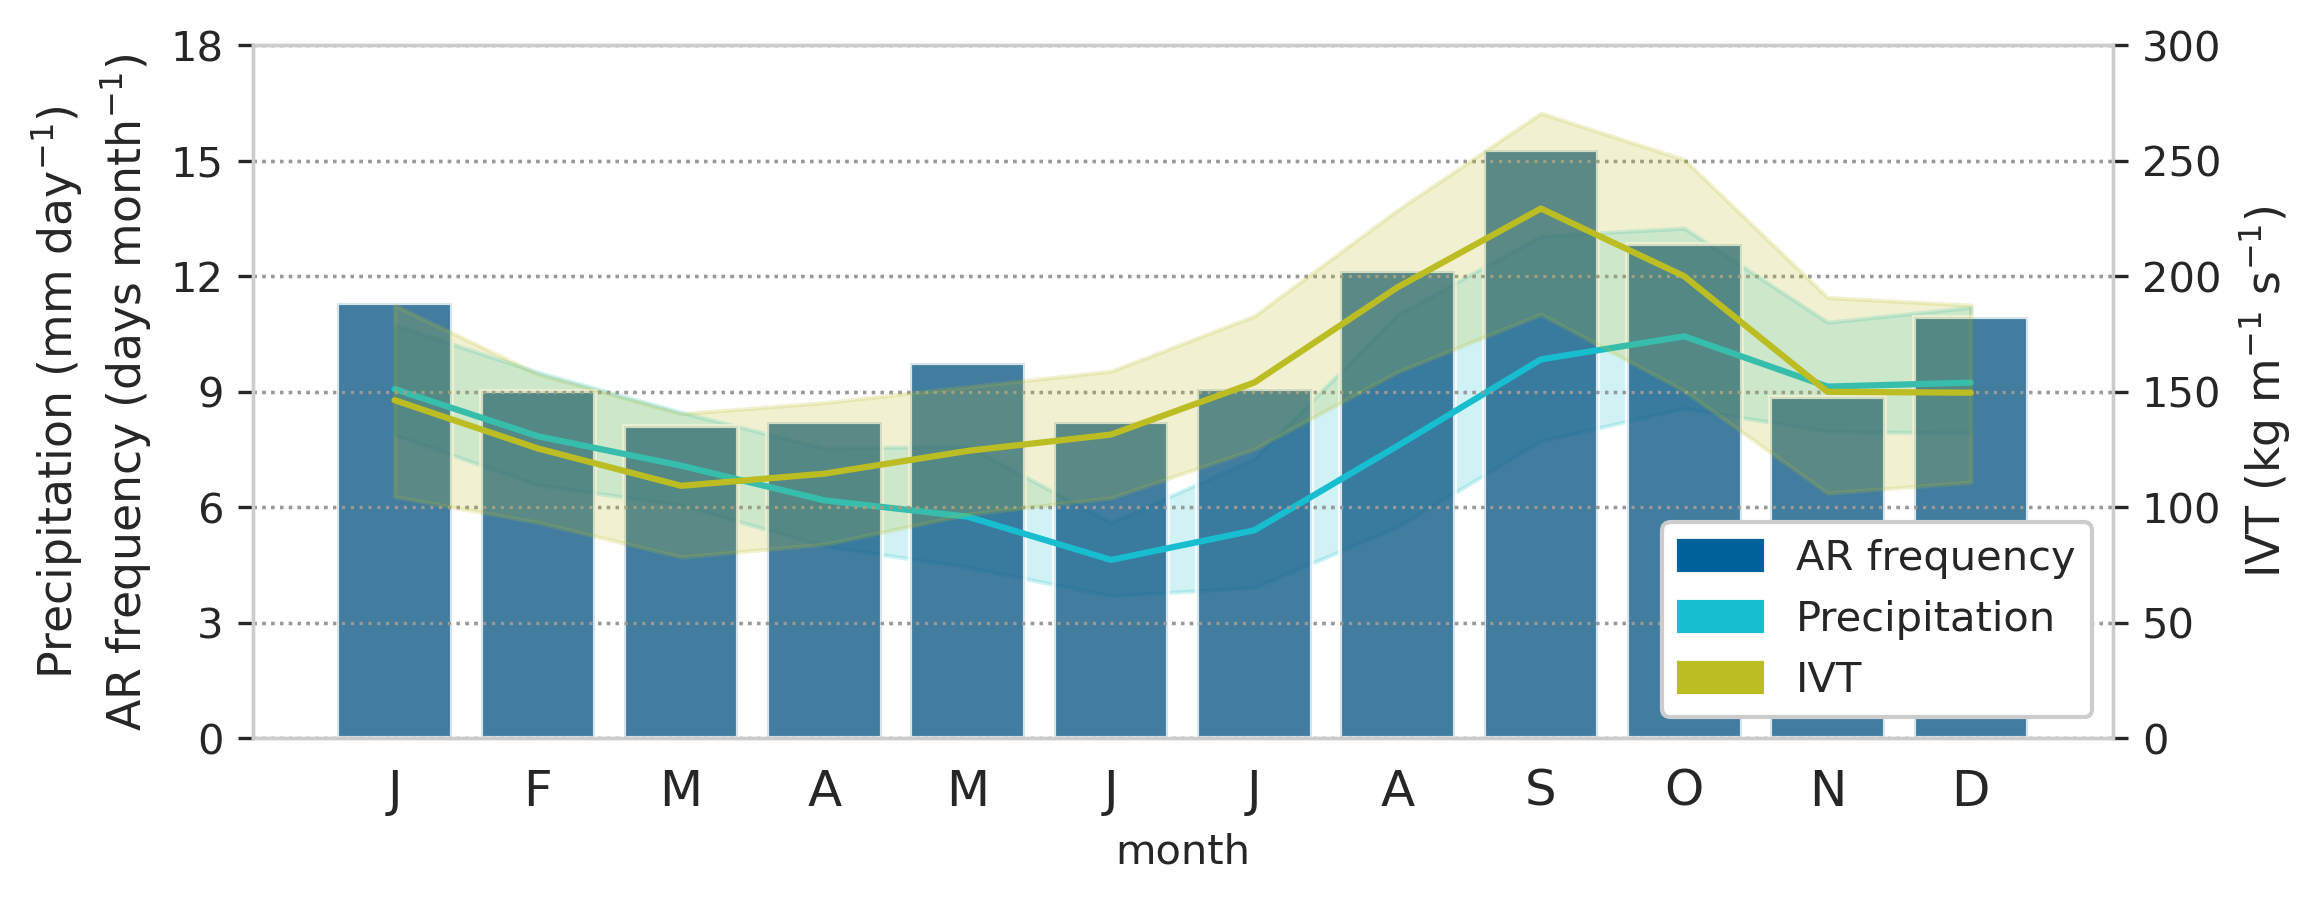

In [6]:
fname = path_to_figs + 'ar_barplot'
fmt = 'png'
fig = plt.figure()
fig.set_size_inches((8.0,3.0))
fig.dpi = 300
nplots=1

# Set custom color palette
colors = ["#00629B"]
sns.set_palette(sns.color_palette(colors))
columns=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
          
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
# sns.set_context("paper")
sns.despine()

colors = [ucsd_colors['navy'], 'tab:cyan', 'tab:olive']

for i in np.arange(nplots):
    ax = fig.add_subplot(1, 1, i+1)
    ## bar plot with AR clim
    sns.barplot(x=np.arange(1, 13, 1), y=ar_clim.iloc[:, 0].values, color=colors[0], alpha=0.8, zorder=10)
    ax.set_ylabel('AR frequency (days month$^{-1}$)', fontsize=11)
    ax.set_xticklabels(columns, fontsize=12)
    ax.set_yticks(np.arange(0, 21, 3))
    ax.set_ylim(0, 18)
    
    ## line plot with precip clim
    # sns.lineplot(data=prec_melt, x="month", y="value", hue="variable", palette="flare", ax=ax) # plots all communities individually
    sns.lineplot(data=prec_melt, x="month", y="value", ax=ax, color=colors[1], zorder=101) # plots community spread
    
    # Add secondary ylabel to first axis
    ax.text(-0.09, 0.5, 'Precipitation (mm day$^{-1}$)', va='bottom', ha='center', 
            rotation='vertical', rotation_mode='anchor', fontsize=11, 
            transform=ax.transAxes)


    ## add twin axis for ivt
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    # sns.lineplot(data=ivt_melt, x="month", y="value", hue="variable", palette="flare", ax=ax2) # plots all communities individually
    sns.lineplot(data=ivt_melt, x="month", y="value", ax=ax2, color=colors[2], zorder=100) # plots community spread
    ax2.set_yticks(np.arange(0, 325, 50))
    ax2.set_ylim(0, 300)
    ax2.set_ylabel('IVT (kg m$^{-1}$ s$^{-1}$)', fontsize=11)
    
    # ax.set_axisbelow(True)
    # ax2.set_axisbelow(True)
    
    # create legend (of the 3 classes)
    patch0 = mpatches.Patch(color=colors[0], label='AR frequency')
    patch1 = mpatches.Patch(color=colors[1], label='Precipitation')
    patch2 = mpatches.Patch(color=colors[2], label='IVT')
    ax2.legend(handles=[patch0,patch1,patch2], loc='lower right', framealpha=1.0).set_zorder(200)
    
# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [39]:
df = df_lst[0] # just get Hoonah
idx = (df.index.year == 1980)
df = df.loc[idx]
df

,time,IVT,lat,lon,uIVT,vIVT,IWV,ivtdir,AR,impact,prec,prec_Hoonah,ivt_Hoonah
time,,,,,,,,,,,,,
1980-01-01,1980-01-01,148.93,58.00,-135.50,29.62,148.30,11.56,211.02,0,0,6.35,0.61,0.58
1980-01-02,1980-01-02,147.08,58.00,-135.50,6.58,146.94,11.51,186.81,0,0,10.58,0.77,0.57
1980-01-03,1980-01-03,101.50,58.00,-135.50,26.70,101.25,10.91,257.80,0,0,20.42,0.93,0.40
1980-01-04,1980-01-04,29.98,58.00,-135.50,21.53,3.76,5.02,357.52,0,0,0.19,0.06,0.06
1980-01-05,1980-01-05,207.19,58.00,-135.50,200.70,-24.81,10.29,343.00,1,0,NaN,NaN,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980-12-27,1980-12-27,52.58,58.00,-135.50,49.19,22.37,8.14,351.33,1,0,0.20,0.06,0.16
1980-12-28,1980-12-28,166.64,58.00,-135.50,50.36,166.27,13.25,240.00,1,0,6.45,0.62,0.63
1980-12-29,1980-12-29,199.99,58.00,-135.50,83.32,199.97,15.56,213.36,1,0,16.09,0.88,0.72


In [40]:
# create a column that shows what the fraction to total annual precip is
annual = df['prec'].sum()
df['frac_annual'] = (df['prec']/annual)*100
df['cum_prec'] = df['frac_annual'].cumsum()
df


/tmp/ipykernel_7713/3100093557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frac_annual'] = (df['prec']/annual)*100
/tmp/ipykernel_7713/3100093557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cum_prec'] = df['frac_annual'].cumsum()


,time,IVT,lat,lon,uIVT,vIVT,IWV,ivtdir,AR,impact,prec,prec_Hoonah,ivt_Hoonah,frac_annual,cum_prec
time,,,,,,,,,,,,,,,
1980-01-01,1980-01-01,148.93,58.00,-135.50,29.62,148.30,11.56,211.02,0,0,6.35,0.61,0.58,0.41,0.41
1980-01-02,1980-01-02,147.08,58.00,-135.50,6.58,146.94,11.51,186.81,0,0,10.58,0.77,0.57,0.69,1.10
1980-01-03,1980-01-03,101.50,58.00,-135.50,26.70,101.25,10.91,257.80,0,0,20.42,0.93,0.40,1.33,2.44
1980-01-04,1980-01-04,29.98,58.00,-135.50,21.53,3.76,5.02,357.52,0,0,0.19,0.06,0.06,0.01,2.45
1980-01-05,1980-01-05,207.19,58.00,-135.50,200.70,-24.81,10.29,343.00,1,0,NaN,NaN,0.73,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980-12-27,1980-12-27,52.58,58.00,-135.50,49.19,22.37,8.14,351.33,1,0,0.20,0.06,0.16,0.01,98.32
1980-12-28,1980-12-28,166.64,58.00,-135.50,50.36,166.27,13.25,240.00,1,0,6.45,0.62,0.63,0.42,98.74
1980-12-29,1980-12-29,199.99,58.00,-135.50,83.32,199.97,15.56,213.36,1,0,16.09,0.88,0.72,1.05,99.79


<AxesSubplot: xlabel='prec_Hoonah', ylabel='Count'>

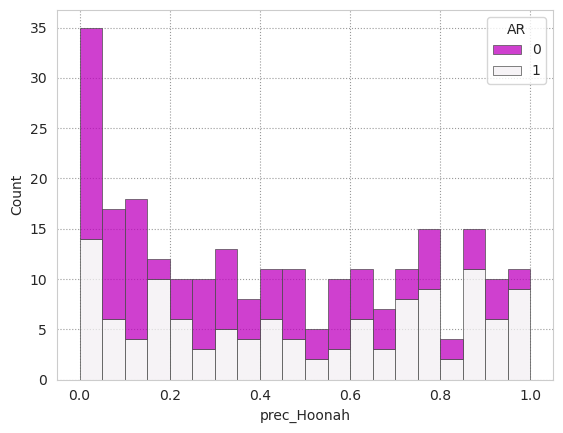

In [45]:
bins = np.arange(0., 1.05, 0.05)

sns.histplot(df, x="prec_Hoonah", hue="AR",
             multiple="stack",
             palette="light:m_r",
             edgecolor=".3",
             linewidth=.5,
             bins=bins)

<AxesSubplot: xlabel='time'>

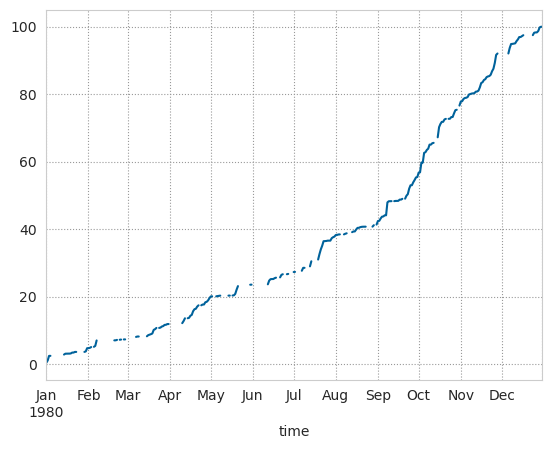

In [19]:
df.cum_prec.plot()

<AxesSubplot: xlabel='time'>

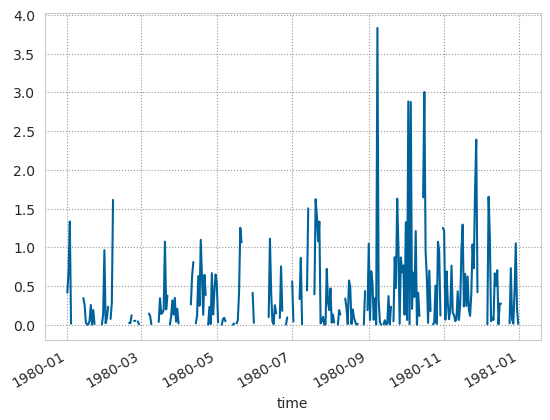

In [24]:
## sort the fraction of annual precip 
test = df['frac_annual'].sort_values()
test.plot()

In [15]:
prec_thres = df['prec'].describe(percentiles=[.95]).loc['95%'] # 95th percentile precipitation threshold
df.query("prec > {0}".format(prec_thres)).shape[0]

13

In [49]:
final_df_lst = []
## some information on AR contribution
for i, df_tmp in enumerate(df_lst):
    prec_thres = df_tmp['prec'].describe(percentiles=[.95]).loc['95%'] # 95th percentile precipitation threshold
    
    summary_df = pd.DataFrame(columns=['# prec days', '# AR days (non-extreme)', '# extreme prec days','# extreme AR days',
                                       'total annual prec', 'total AR prec (non-extreme)', 'total extreme prec', 'total extreme AR prec'], index=range(1980, 2020))
    
    for j, yr in enumerate(range(1980, 2020)):
        idx = (df_tmp.index.year == yr)
        df = df_tmp.loc[idx]
        # number of days per year with precipitation > 0.1
        total_count = df.shape[0]
        calm_count = df.query("prec < 0.1").shape[0]
        x = (total_count - calm_count) # number of days with precipitation greater than 0.1 mm per day
        
        # number of AR days per year
        idx = (df.AR == 1) & (df.prec > 0.1) & (df.prec < prec_thres)
        ar_days = len(df.loc[idx]) # number of AR days per year
        ar_prec_clim = df.loc[idx].prec.sum() # get total precipitation per year during non-extreme ARs
    
        # AR contribution to total annual precipitation
        ## (total annual precip during AR days / total annual precip) * 100
        prec_clim = df.prec.sum() # get total precipitation per year
        
        # number of days per year where precipitation is "extreme" > 95th percentile
        extreme_count = df.query("prec > {0}".format(prec_thres)).shape[0]
    
        ## number of AR days with extreme precipitation
        idx = (df.AR == 1) & (df.prec > prec_thres)
        ar_days_extreme  = len(df.loc[idx]) # days
        ar_prec_clim_extreme = df.loc[idx].prec.sum() # amount of precip
    
        ## AR contribution to extreme precipitation
        ## (total annual precip during extreme AR days / total annual precip during extreme precip) * 100
        extreme_prec_clim = df.loc[(df.prec > prec_thres)].prec.sum()
        ar_contr_extreme = (ar_prec_clim_extreme / extreme_prec_clim) *100
        
        summary_df.loc[yr] = pd.Series({'# prec days': x,
                                        '# AR days (non-extreme)': ar_days,
                                        '# extreme prec days': extreme_count,
                                        '# extreme AR days': ar_days_extreme,
                                        'total annual prec': prec_clim,
                                        'total AR prec (non-extreme)': ar_prec_clim,
                                        'total extreme prec': extreme_prec_clim, 
                                        'total extreme AR prec': ar_prec_clim_extreme})
    final_df_lst.append(summary_df)


In [50]:
final_df_lst[0]

,# prec days,# AR days (non-extreme),# extreme prec days,# extreme AR days,total annual prec,total AR prec (non-extreme),total extreme prec,total extreme AR prec
1980,340.00,102.00,11.00,9.00,"1,531.78",662.18,380.82,331.08
1981,332.00,112.00,9.00,9.00,"1,845.29",872.38,382.96,382.96
1982,346.00,77.00,5.00,4.00,"1,282.31",575.55,182.72,157.58
1983,341.00,74.00,7.00,6.00,"1,348.59",499.51,261.59,230.77
1984,354.00,82.00,12.00,8.00,"1,677.33",620.67,385.08,233.75
1985,352.00,81.00,11.00,10.00,"1,635.35",605.08,397.00,355.40
1986,355.00,85.00,17.00,16.00,"1,886.28",658.83,576.57,550.78
1987,352.00,111.00,13.00,11.00,"1,978.94",943.22,384.08,314.97
1988,356.00,99.00,14.00,13.00,"1,692.44",738.49,422.66,395.12
1989,348.00,67.00,10.00,8.00,"1,399.43",562.07,339.03,285.35


In [56]:
a = ((340 - 11)/340)*100 # total number of non-AR, non-extreme precip days
b = ((340 - 102.00)/340)*100 # total number of AR, non-extreme precip days
c = (9/340)*100 # total number of AR extreme precip days
d = ((11 - 9)/340)*100 # total number of non-AR extreme precip days
print(a, b, c, d)
lblin = ['{0} days'.format(340 - 11), 
         '{0} days'.format(340-102), 
         '{0} days'.format(9),
         '{0} days'.format(11-9)]

A = ((1531.78 - 380.82)/1531.78)*100 # total non-AR non-extreme precip
B = ((1531.78 - 662.18)/1531.78)*100 # total AR, non-extreme precip
C = (331.08/1531.78)*100 # total AR extreme precip
D = ((380.82 - 331.08)/1531.78)*100 # total non-AR extreme precip
lblout = ['{0} mm'.format(round(1531.78 - 380.82)), 
          '{0} mm'.format(round(1531.78 - 662.18)), 
          '{0} mm'.format(round(331.08)), 
          '{0} mm'.format(round(380.82 - 331.08))]
print(A, B, C, D)

96.76470588235294 70.0 2.6470588235294117 0.5882352941176471
75.13872749350429 56.77055451827287 21.61406990560002 3.2472026008956907


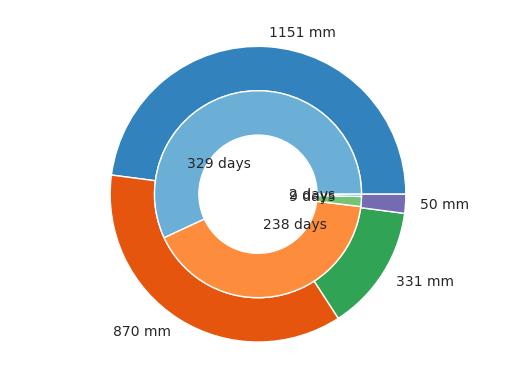

In [64]:
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

cm = plt.get_cmap("tab20c")
cout = cm(np.arange(4)*4)

pie, _ = ax.pie([A,B,C, D], radius=1, labels=lblout, colors=cout)
plt.setp( pie, width=width, edgecolor='white')

cin = cm(np.array([1,5,9]))

# labels = list(map("".join, zip(list("abc"),map(str, [1,2]*3))))
pie2, _ = ax.pie([a,b,c,d], radius=1-width, labels=lblin,
                                      labeldistance=0.3, colors=cin)
plt.setp( pie2, width=width, edgecolor='white')
plt.show()

In [17]:
idx = (df['prec'] > prec_thres)
tmp = df.loc[idx]
tmp.prec.sum()

425.29095700000005

In [15]:
## some information on AR contribution
for i, df in enumerate(df_lst):
    print('On average in {0}...'.format(community_lst[i]))
    # number of days per year with precipitation > 0.1
    total_count = df.shape[0]
    calm_count = df.query("prec < 0.1").shape[0]
    # print('Of {} total observations, {} have less than 0.1 mm of precipitation.'.format(total_count, calm_count))
    x = (total_count - calm_count) / 40.
    print('...there are {0} days per year with precipitation greater than 0.1 mm per day'.format(x))
    # number of AR days per year
    idx = (df.AR == 1) & (df.prec > 0.1)
    tmp = df.loc[idx]
    ar_days = len(tmp) / 40.
    print('...there are {0} AR days per year'.format(ar_days))
    
    # AR contribution to total annual precipitation
    ## (total annual precip during AR days / total annual precip) * 100
    prec_clim = df.prec.groupby(df.index.year).sum() # get total precipitation per year
    ar_prec_clim = tmp.prec.groupby(tmp.index.year).sum() # get total precipitation per year during ARs
    ar_contr = (ar_prec_clim / prec_clim) *100
    avg_ar_contr = ar_contr.mean()
    print(u'...ARs contribute {:.2f}% to total annual precipitation'.format(avg_ar_contr))
    
    # number of days per year where precipitation is "extreme" > 95th percentile
    prec_thres = df['prec'].describe(percentiles=[.95]).loc['95%'] # 95th percentile precipitation threshold
    extreme_count = df.query("prec > {0}".format(prec_thres)).shape[0]
    x = extreme_count / 40.
    print(u'...there are {:.2f} days per year with precipitation greater than {:.2f} mm per day'.format(x, prec_thres))
    
    ## number of AR days with extreme precipitation
    idx = (df.AR == 1) & (df.prec > prec_thres)
    tmp = df.loc[idx]
    ar_days_extreme = len(tmp) / 40.
    print('...{0} of which are AR days'.format(ar_days_extreme))
    
    ## AR contribution to extreme precipitation
    ## (total annual precip during extreme AR days / total annual precip during extreme precip) * 100
    extreme_prec = df.loc[(df.prec > prec_thres)]
    extreme_prec_clim = extreme_prec.prec.groupby(extreme_prec.index.year).sum() # get total precipitation during extreme events
    ar_prec_clim_extreme = tmp.prec.groupby(tmp.index.year).sum() # get total precipitation per year during extreme ARs
    ar_contr = (ar_prec_clim_extreme / extreme_prec_clim) *100
    avg_ar_contr = ar_contr.mean()
    print(u'...ARs contribute {:.2f}% to extreme precipitation'.format(avg_ar_contr))
    
    # number of impact days that are also ARs
    a = len(df.loc[(df['impact'] == 1)])
    b = len(df.loc[(df['impact'] == 1) & (df['AR'] == 1) ])
    print('...Out of the {0} days indicated as an impact day, {1} of them were associated with an AR'.format(a, b))

On average in Hoonah...
...there are 357.475 days per year with precipitation greater than 0.1 mm per day
...there are 98.15 AR days per year
...ARs contribute 61.32% to total annual precipitation
...there are 11.47 days per year with precipitation greater than 23.55 mm per day
...9.95 of which are AR days
...ARs contribute 86.58% to extreme precipitation
...Out of the 214 days indicated as an impact day, 156 of them were associated with an AR
On average in Skagway...
...there are 358.85 days per year with precipitation greater than 0.1 mm per day
...there are 86.875 AR days per year
...ARs contribute 65.37% to total annual precipitation
...there are 9.45 days per year with precipitation greater than 26.76 mm per day
...8.3 of which are AR days
...ARs contribute 89.22% to extreme precipitation
...Out of the 214 days indicated as an impact day, 156 of them were associated with an AR
On average in Klukwan...
...there are 355.5 days per year with precipitation greater than 0.1 mm per day


In [16]:
## getting bins for windrose based on percentiles
perc = [0., 0.10, 0.25, 0.5, 0.75, .95, 1.]
perc_lbl = ['0%', '10%', '25%', '50%', '75%', '95%', '100%']
prec_thres_lst = []
ivt_thres_lst = []
for i, df in enumerate(df_lst):
    sublist = []
    sublist_ivt = []
    for j, (thres, lbl) in enumerate(zip(perc, perc_lbl)):
        sublist.append(df['prec'].describe(percentiles=[thres]).loc[[lbl]].values.tolist())
        sublist_ivt.append(df['IVT'].describe(percentiles=[thres]).loc[[lbl]].values.tolist())
    flat_list = [item for l in sublist for item in l] # flatten the list
    flat_list_ivt = [item for l in sublist_ivt for item in l] # flatten the list
    prec_thres_lst.append(flat_list)
    ivt_thres_lst.append(flat_list_ivt)

In [17]:
# 95th percentile threshold for precipitation and IVT for ALL days
prec_thres = []
ivt_thres = []
for i, df in enumerate(df_lst):
    prec_thres.append(df['prec'].describe(percentiles=[.95]))
    ivt_thres.append(df['IVT'].describe(percentiles=[.95]))
    
    df['IVT'].describe(percentiles=[.95]).loc['95%']
    
non_ar_days = []
ar_days = []
ar_extreme = []
non_ar_extreme = []

for i, df in enumerate(df_lst):
    non_ar_days.append(len(df.loc[(df['prec'] < prec_thres[i]['95%']) & (df.AR == 0)]))
    ar_days.append(len(df.loc[(df['prec'] < prec_thres[i]['95%']) & (df.AR == 1)]))
    non_ar_extreme.append(len(df.loc[(df['prec'] > prec_thres[i]['95%']) & (df.AR == 0)]))
    ar_extreme.append(len(df.loc[(df['prec'] > prec_thres[i]['95%']) & (df.AR == 1)]))
                    
d = {'Community': community_lst, 'non-AR days': non_ar_days, 'AR days': ar_days, 'Extreme non-AR days': non_ar_extreme, 'Extreme AR days': ar_extreme}
table = pd.DataFrame(data=d)

table

,Community,non-AR days,AR days,Extreme non-AR days,Extreme AR days
0,Hoonah,5101,3618,61,398
1,Skagway,3948,3231,46,332
2,Klukwan,3565,3155,43,311
3,Yakutat,4879,3599,63,384
4,Craig,5341,3380,77,382
5,Kasaan,5093,3277,119,322


### Plot IVT/Precip Scatter and IVT direction and precipitation in windrose
Use https://gist.github.com/phobson/41b41bdd157a2bcf6e14 as an example

In [18]:
## Define a function that gives nice labels for precipitation ranges

def range_labels(bins):   
    labels = []
    for left, right in zip(bins[:-1], bins[1:]):
        if left == bins[0]:
            labels.append('<{}'.format(right))
        elif right == bins[-1]:
            labels.append('>{}'.format(left))
        else:
            labels.append('{}-{}'.format(str(left[:-1]), right))

    return list(labels)

## Define a function to convert centered angles to left-edge radians
def _convert_dir(directions, N=None):
    if N is None:
        N = directions.shape[0]
    barDir = directions * np.pi/180. - np.pi/N
    barWidth = 2 * np.pi / N
    return barDir, barWidth

## define wind rose function
def wind_rose(ax, rosedata, wind_dirs, legend_req, palette=None):
    if palette is None:
        palette = sns.color_palette('inferno', n_colors=rosedata.shape[1])
    else:
        palette = sns.color_palette(palette, n_colors=rosedata.shape[1])

    bar_dir, bar_width = _convert_dir(wind_dirs)

    
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')

    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(bar_dir, rosedata[c1].values, 
                   width=bar_width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(bar_dir, rosedata[c2].values, 
               width=bar_width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)
        
    # xticks = ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 8, endpoint=False))
    xtl = ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    if legend_req == True:
        leg = ax.legend(loc=(0.75, 0.1), ncol=1, fontsize=12, title='Percentile')
    
    return ax

def calc_rose(df, prec_bins, prec_labels, dir_bins, dir_labels):
    '''
    ### Determine the relative percentage of observation in each speed and direction bin
    Here's how we do it:

    - assign a precipitation bin for each row with pandas.cut
    - assign a direction bin for each row (again, pandas.cut)
    - unify the 360° and 0° bins under the 0° label
    - group the data simultaneously on both precipitation and direction bins
    - compute the size of each group
    - unstack (pivot) the speed bins into columns
    - fill missing values with 0
    - assign a "calm" column to be the total number of calm observations evenly distributed across all directions
    - sort the columns -- they are a catgerical index, so "calm" will be first (this is awesome!)
    - convert all of the counts to percentages of the total number of observations
    '''
    total_count = df.shape[0]
    # if temporal_res == 'hourly':
    #     calm_thres = 0.1
    # if temporal_res == 'daily':
    #     calm_thres = 2
    calm_thres = prec_bins[0]
    calm_count = df.query("prec < {0}".format(calm_thres)).shape[1]
    print('Of {} total observations, {} have less than {} mm of precipitation.'.format(total_count, calm_count, calm_thres))
    
    df = (df.assign(prec_bins=lambda df: pd.cut(df['prec'], bins=prec_bins, labels=prec_labels, right=True))
          .assign(ivtdir_bins=lambda df: pd.cut(df['ivtdir'], bins=dir_bins, labels=dir_labels, right=False))
          .replace({'ivtdir_bins': {360: 0}})
          .groupby(by=['prec_bins', 'ivtdir_bins'])
          .size()
          .unstack(level='prec_bins')
          .fillna(0)
          # .assign(clear=lambda df: calm_count / df.shape[0])
          .sort_index(axis=1)
          .applymap(lambda x: x / total_count * 100))
        
    return df

IVT thres: 414.24 Prec thres: 23.55
IVT thres: 262.07 Prec thres: 26.76
IVT thres: 254.00 Prec thres: 22.34
IVT thres: 391.70 Prec thres: 42.11
IVT thres: 526.56 Prec thres: 23.82
IVT thres: 497.09 Prec thres: 24.97


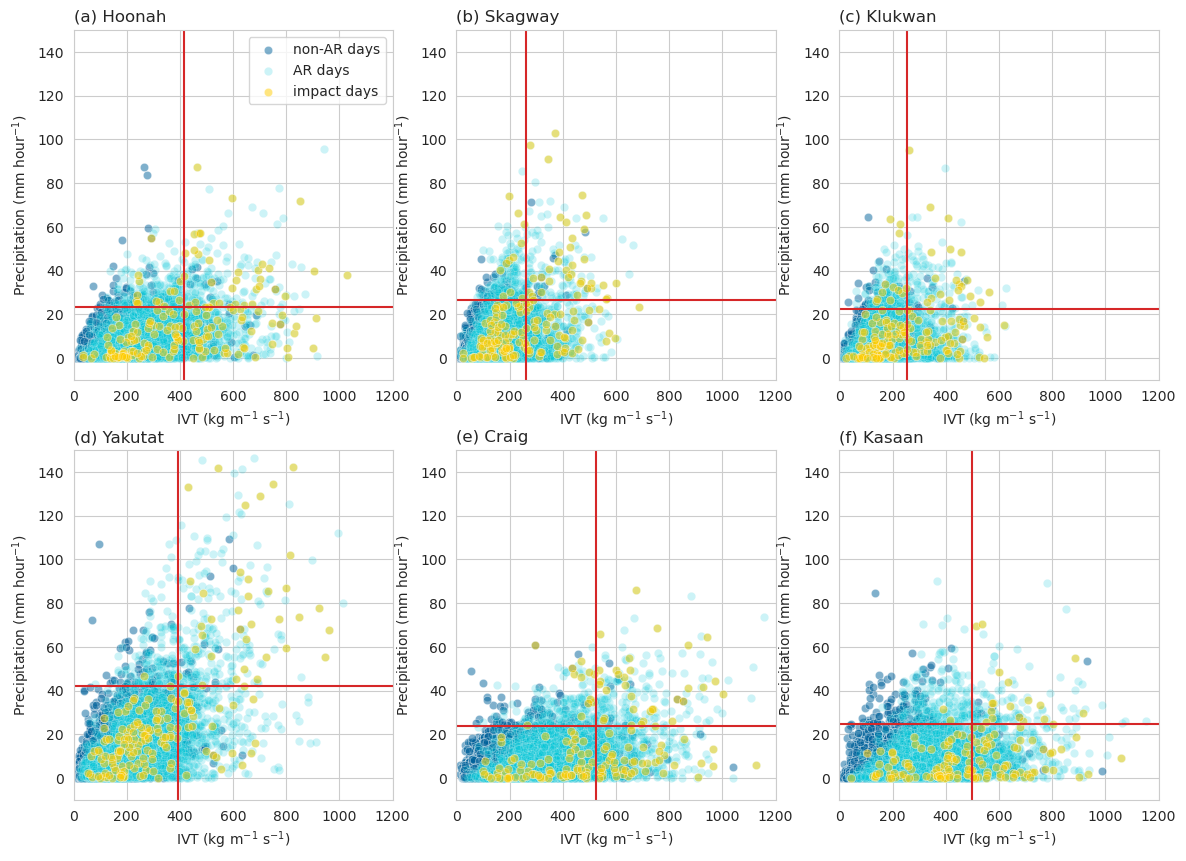

../figs/IVT-prec_scatter_daily.png


In [19]:
# list of letters to append to titles
letter_lst = list(map(chr, range(97, 123)))
colors = [ucsd_colors['navy'], ucsd_colors['aqua'], ucsd_colors['yellow'], ucsd_colors['grey']]
legend_lst = [True] + [False]*5
# legend_lst = [True]*6

fname = path_to_figs + 'IVT-prec_scatter_{0}'.format(temporal_res)
fmt = 'png'
nrows = 2
ncols = 3
nplots=nrows*ncols

fig = plt.figure(figsize=(14,10))

sns.set_style("whitegrid")

for i, df in enumerate(df_lst):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ## get 95th percentile of ivt and precip
    ivt_thres = df['IVT'].describe(percentiles=[.95]).loc['95%']
    prec_thres = df['prec'].describe(percentiles=[.95]).loc['95%']
    
    # plot non-AR cases
    data = df.loc[(df.AR == 0)]
    n = len(data)
    g = sns.scatterplot(data=data, x="IVT", y="prec", ax=ax, c=np.array([colors[0]]), label='non-AR days'.format(n), alpha=0.5, legend=legend_lst[i])
    
    
    # plot AR cases
    data = df.loc[(df.AR == 1)]
    n = len(data)
    g = sns.scatterplot(data=data, x="IVT", y="prec", ax=ax, c=np.array([colors[1]]), label='AR days'.format(n), alpha=0.2, legend=legend_lst[i])
    
    
    
    print('IVT thres: {:,.2f}'.format(ivt_thres), 'Prec thres: {:,.2f}'.format(prec_thres))
    
    plt.axhline(y=prec_thres, color='tab:red', linestyle='-')
    plt.axvline(x=ivt_thres, color='tab:red', linestyle='-')
    
    ## plot Extreme AR days
    data = df.loc[(df['impact'] == 1)]
    n = len(data)
    g = sns.scatterplot(data=data, x="IVT", y="prec", ax=ax, c=np.array([colors[2]]), label='impact days'.format(n), alpha=0.5, legend=legend_lst[i])
    
#     ## plot Extreme non-AR days
#     data = df.loc[(df['prec'] > prec_thres) & (df.AR == 0)]
#     n = len(data)
#     g = sns.scatterplot(data=data, x="IVT", y="prec", ax=ax, c=np.array([colors[3]]), label='Extreme non-AR days (n={0})'.format(n), alpha=0.5, legend=legend_lst[i])
    
    
    ax.set_xlabel('IVT (kg m$^{-1}$ s$^{-1}$)')
    if temporal_res == 'hourly':
        ax.set_ylim(-.5, 25)
        ax.set_xlim(0, 1200)
        y_lbl = 'Precipitation (mm hour$^{-1}$)'
    elif temporal_res == 'daily':
        ax.set_ylim(-10, 150)
        ax.set_xlim(0, 1200)
        y_lbl = 'Precipitation (mm hour$^{-1}$)'
        
    ax.set_title('({0}) {1}'.format(letter_lst[i], community_lst[i]), loc='left')
    # ax.set_title('(n={0})'.format(n), loc='right')
    
    ax.set_ylabel(y_lbl)
    
    if legend_lst == True:
        leg = ax.legend(loc='upper left', ncol=1)
    
# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
plt.show()
fig.clf()

plotFile = fname + '.png'
print(plotFile)

In [20]:
def assign_percentiles(df, prec_bins, ivt_bins, perc_labels):
    '''
    ### Determine the percentile group for precipitation and ivt

    - assign a precipitation bin for each row with pandas.cut
    - assign a ivt bin for each row with pandas.cut
    '''
    
    df = (df.assign(prec_bins=lambda df: pd.cut(df['prec'], bins=prec_bins, labels=perc_labels, right=True))
            .assign(ivt_bins=lambda df: pd.cut(df['IVT'], bins=ivt_bins, labels=perc_labels, right=True))
         )
    
    df = df.rename(columns={"prec_bins": "Precipitation Percentiles", "ivt_bins": "IVT Percentiles"})
        
    return df

def community_heatmap_values(df, perc_lbl):
    denom = np.empty((6, 6), float)
    num = np.empty((6, 6), float)
    extreme_prec_AR = np.empty((6), float)
    extreme_ivt_AR = np.empty((6), float)
    for i, perc_i in enumerate(perc_lbl):
        ## get total number of precipitation days within each percentile bin
        idx = (df['Precipitation Percentiles'] == perc_i)
        denom_val = len(df.loc[idx])
        

        ## get total number of IVT days within the same percentile bin
        
        for j, perc_j in enumerate(perc_lbl):
            idx = (df['Precipitation Percentiles'] == perc_i) & (df['IVT Percentiles'] == perc_j)
            num_val = len(df.loc[idx])
            num[j, i] = num_val # put numerator in array
            
            # put denominator in array
            denom[j, i] = denom_val # put denominator in array
            
            
        ## get fraction of AR days that are also 95th percentile precip
        idx = (df['Precipitation Percentiles'] == perc_i) & (df['AR'] == 1)
        AR_num = len(df.loc[idx])
        extreme_prec_AR[i] = (AR_num/denom_val)*100

        ## get fraction of AR days that are also 95th percentile IVT
        idx = (df['IVT Percentiles'] == perc_i)
        denom_val = len(df.loc[idx])
        idx = (df['IVT Percentiles'] == perc_i) & (df['AR'] == 1)
        AR_num = len(df.loc[idx])
        extreme_ivt_AR[i] = (AR_num/denom_val)*100
        
    heatmap_vals = (num/denom)*100
    
    return heatmap_vals, extreme_prec_AR, extreme_ivt_AR


def create_heatmap_plot(heatmap_vals, extreme_prec_AR, extreme_ivt_AR, ax, axhistx, axhisty, tck_lblx, tck_lbly, bar_tck):

    # no labels, remove spines
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['right'].set_visible(False)
    ax_histx.set_ylim(0, 99)

    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['right'].set_visible(False)
    ax_histy.set_ylim(0, 99)
    
    ax_histx.bar(x = bar_tck, height=extreme_prec_AR, align='edge', color='#DAE6E6')
    ax_histy.barh(range(len(bar_tck)), np.flip(extreme_ivt_AR), align='edge', color='#DAE6E6')
    
    ## add heatmap
    g = sns.heatmap(np.flipud(heatmap_vals), cmap=cmo.dense, annot=True, linewidth=.5, xticklabels=tck_lblx, yticklabels=tck_lbly, ax=ax, cbar=False)
    # apply tick parameters    
    ax.tick_params(direction='out', 
                   labelsize=8, 
                   length=4, 
                   pad=2, 
                   color='black',
                   labelrotation=0.0)
    
    

    

## Create panel plot of percentile histogram plots

In [21]:
np.flip(range_labels(perc_lbl))

array(['>95%', '75-95%', '50-75%', '25-50%', '10-25%', '<10%'],
      dtype='<U6')

[28.46237732 30.35584604 32.47602441 44.96732026 63.32425068 86.71023965] [ 1.71232877  4.47080292 13.82803943 38.49945235 74.70910335 93.84404925]
[32.84960422 32.59717314 38.29449153 48.86183166 63.93117141 87.83068783] [ 2.32876712  6.20437956 17.33296824 36.66484118 71.38945927 92.33926129]
[32.71954674 34.40150801 38.57466063 50.98925947 68.9533239  87.85310734] [ 2.73972603  6.56934307 16.31982475 37.02081051 71.66324435 92.6128591 ]
[23.20627803 30.2759135  36.11484971 45.85387719 64.9103139  85.90604027] [ 4.7260274   9.44343066 15.99123768 35.56955093 70.63655031 93.02325581]
[28.43137255 29.72383721 31.78058337 39.51155691 58.4422658  83.22440087] [ 3.35616438  6.66058394 13.14348302 35.24096386 77.24161533 93.57045144]
[29.17139614 30.88569266 33.45438039 39.32788374 57.26447219 73.01587302] [ 3.97260274  6.25       13.52683461 35.78860898 76.07802875 93.57045144]


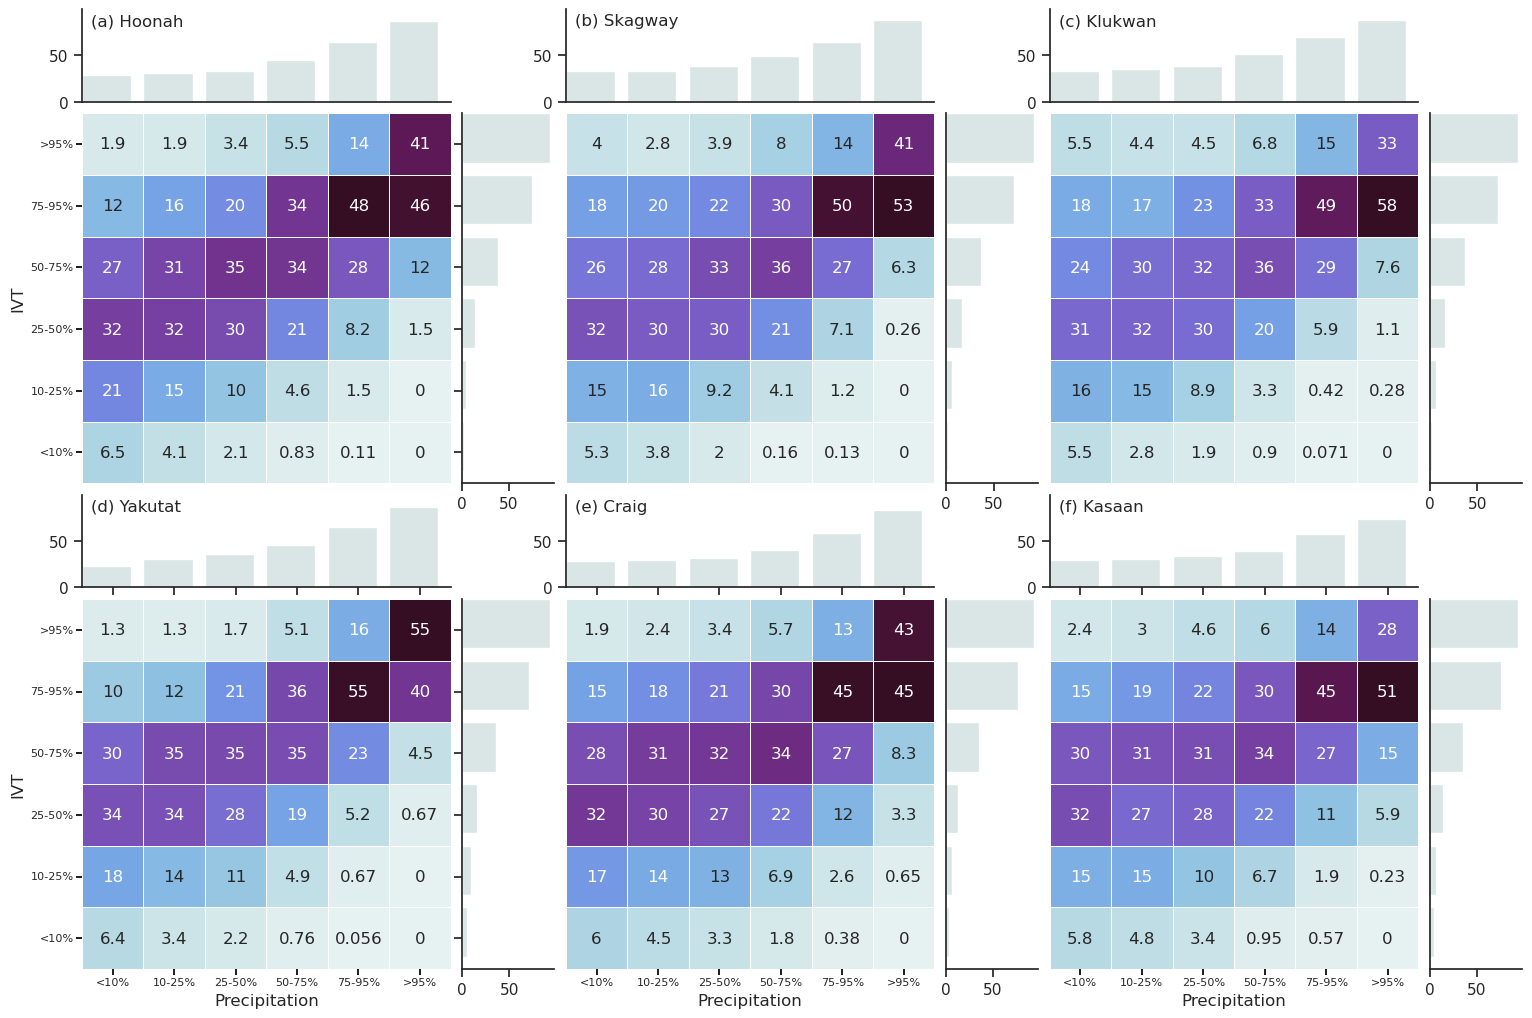

../figs/percentile_bins_daily.png


In [22]:
fname = path_to_figs + 'percentile_bins_{0}'.format(temporal_res)
fmt = 'png'

# list of letters to append to titles
letter_lst = list(map(chr, range(97, 123)))

# Start with a square Figure. - then multiple each by the number of rows and columns you want of each full panel
nrows = 2
ncols = 3
# lists of axes locations - I couldn't math this out, but this works
ax_lst = [[1, 0], [1, 2], [1, 4], [3, 0], [3, 2], [3, 4]]
axhistx_lst = [[0, 0], [0, 2], [0, 4], [2, 0], [2, 2], [2, 4]]
axhisty_lst = [[1, 1], [1, 3], [1, 5], [3, 1], [3, 3], [3, 5]]

tcklblx_lst = [False, False, False, range_labels(perc_lbl), range_labels(perc_lbl), range_labels(perc_lbl)]
tcklbly_lst = [np.flip(range_labels(perc_lbl)), False, False, np.flip(range_labels(perc_lbl)), False, False]

xlbl_lst = ['']*3 + ['Precipitation']*3
ylbl_lst = ['IVT', '', '']*2

sns.set_theme(style="ticks")

fig = plt.figure(figsize=(6*ncols, 6*nrows))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2*nrows, 2*ncols,  width_ratios=[4, 1]*ncols, height_ratios=[1, 4]*nrows,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


for i, df in enumerate(df_lst):
    # get percentile values
    perc_prec = prec_thres_lst[i]
    perc_ivt = ivt_thres_lst[i]
    # giving each df a column for percentile bins for precip and ivt
    tmp = assign_percentiles(df, prec_thres_lst[i], ivt_thres_lst[i], range_labels(perc_lbl))
    heatmap_vals, extreme_prec_AR, extreme_ivt_AR = community_heatmap_values(tmp, range_labels(perc_lbl))
    print(extreme_prec_AR, extreme_ivt_AR)
    
    # Create the Axes.
    ax = fig.add_subplot(gs[ax_lst[i][0], ax_lst[i][1]])
    ax_histx = fig.add_subplot(gs[axhistx_lst[i][0], axhistx_lst[i][1]], sharex=ax)
    ax_histy = fig.add_subplot(gs[axhisty_lst[i][0], axhisty_lst[i][1]], sharey=ax)
    
    # plot the heatmap and marginal bar charts
    create_heatmap_plot(heatmap_vals, extreme_prec_AR, extreme_ivt_AR, ax, ax_histx, ax_histy, tcklblx_lst[i], tcklbly_lst[i], range_labels(perc_lbl))
    ax.set_xlabel(xlbl_lst[i])
    ax.set_ylabel(ylbl_lst[i])
    
    # plot title
    titlestring = '({0}) {1}'.format(letter_lst[i], community_lst[i])
    ax_histx.text(0.025, 1.27, titlestring, ha='left', va='top', transform=ax.transAxes, fontsize=12., backgroundcolor='white', zorder=101)
    
    ax_histy.invert_yaxis()
    ax.invert_yaxis()
    
# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=300)
plt.show()
fig.clf()

plotFile = fname + '.png'
print(plotFile)